In [1]:
#Downloads\Feb_14\LC08_L1TP_147041_20140216_20170425_01_T1_B1.TIF

In [1]:
import rasterio
from rasterio import plot
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import os
import pandas as pd
import skimage.measure
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score, KFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
date_time = "feb_14"
blue = rasterio.open(r'C:\Users\hp\Downloads\Feb_14\LC08_L1TP_147041_20140216_20170425_01_T1_B2.TIF') #blue
red = rasterio.open(r'C:\Users\hp\Downloads\Feb_14\LC08_L1TP_147041_20140216_20170425_01_T1_B4.TIF') #red
nir = rasterio.open(r'C:\Users\hp\Downloads\Feb_14\LC08_L1TP_147041_20140216_20170425_01_T1_B5.TIF') #nir

In [3]:
def cal_ndvi(red,nir,date_time):
    date_time = date_time+"_ndvi"
    red.dtypes[0]
    #raster sytem of reference
    red.crs
    #raster transform parameters
    red.transform
    #raster values as matrix array
    red.read(1)
    
    nir.dtypes[0]
    #raster sytem of reference
    nir.crs
    #raster transform parameters

    nir.transform
    #raster values as matrix array
    nir.read(1)
    red = red.read(1).astype('float64')
    nir = nir.read(1).astype('float64')
    np.seterr(divide='ignore', invalid='ignore')
    {'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}
    check = np.logical_or ( red > 0, nir > 0 )
    ndvi = np.where ( check,  (nir - red ) / ( nir + red ), -999 )
    ndvi = skimage.measure.block_reduce(ndvi, (5,5), np.max)
    df = pd.DataFrame({date_time:ndvi.ravel()})
    df =df[df[date_time] > -999]
    df[date_time].round(2)
    df.head()
    return df

In [4]:
z =cal_ndvi(red, nir,date_time)

In [5]:
z.shape

(1662638, 1)

In [6]:
z.head()

,feb_14_ndvi
1520,0.000000
1799,0.082560
1800,0.081755
1801,0.081505
1802,0.074270


In [7]:
z.describe()

,feb_14_ndvi
count,1.662638e+06
mean,3.051249e-01
std,1.174902e-01
min,-1.000000e+00
25%,1.813660e-01
50%,3.449637e-01
75%,4.052835e-01
max,1.000000e+00


In [8]:
def cal_evi(blue, red, nir,date_time):
    date_time = date_time+"_evi"
    red.dtypes[0]
    #raster sytem of reference
    red.crs
    #raster transform parameters
    red.transform
    #raster values as matrix array
    red.read(1)
    
    nir.dtypes[0]
    #raster sytem of reference
    nir.crs
    #raster transform parameters

    nir.transform
    #raster values as matrix array
    nir.read(1)
    red = red.read(1).astype('float64')
    nir = nir.read(1).astype('float64')
    blue.dtypes[0]
    blue.crs
    blue.transform
    blue = blue.read(1).astype('float64')
    np.seterr(divide='ignore', invalid='ignore')
    {'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}
    check = np.logical_or ( red > 0, nir > 0, blue > 0 )
    evi = np.where ( check,  (2.5 * ( nir - red ) / ( nir + 6.0 * red - 7.5 * blue+ 1.0 )), -999 )
    evi = skimage.measure.block_reduce(evi, (5,5), np.max)
    df2 = pd.DataFrame({date_time:evi.ravel()})
    df2 =df2[df2[date_time] > -999]
    return df2

In [9]:
y = cal_evi(blue,red,nir,date_time)

In [10]:
y.head()

,feb_14_evi
1520,0.000000
1799,2.776939
1800,7.080562
1801,1.620511
1802,1.418782


In [11]:
y.describe()

,feb_14_evi
count,1.662638e+06
mean,inf
std,NaN
min,-6.099026e+01
25%,-1.925122e+00
50%,-6.773894e-01
75%,1.700820e+01
max,inf


In [12]:
def dataframe():
    df2 = cal_evi(blue,red,nir,date_time)
    df = cal_ndvi(red, nir,date_time)
    merged = pd.concat([df,df2], axis=1)
    return merged

In [13]:
df = dataframe()

In [14]:
df.head()

,feb_14_ndvi,feb_14_evi
1520,0.000000,0.000000
1799,0.082560,2.776939
1800,0.081755,7.080562
1801,0.081505,1.620511
1802,0.074270,1.418782


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1662638 entries, 1520 to 2359070
Data columns (total 2 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   feb_14_ndvi  1662638 non-null  float64
 1   feb_14_evi   1662638 non-null  float64
dtypes: float64(2)
memory usage: 38.1 MB


## labels
0 = Non Agriculture
1 = Low Agriculture
2 = Healthy Agriculture
3 = Dense Agriculture"

In [16]:
result = [] 
for value in df['feb_14_ndvi']: 
    if value <= 0.3: 
        result.append(0) 
    elif value > 0.3 and value <= 0.45: 
        result.append(1) 
    elif value > 0.45 and value <= 0.6: 
        result.append(2) 
    elif value > 0.6 and value <= 0.8: 
        result.append(3) 
    else: 
        result.append(0) 
       
df['label'] = result    
print(df) 

         feb_14_ndvi  feb_14_evi  label
1520        0.000000    0.000000      0
1799        0.082560    2.776939      0
1800        0.081755    7.080562      0
1801        0.081505    1.620511      0
1802        0.074270    1.418782      0
...              ...         ...    ...
2359066     0.000000    0.000000      0
2359067     0.000000    0.000000      0
2359068     0.000000    0.000000      0
2359069     0.000000    0.000000      0
2359070     0.000000    0.000000      0

[1662638 rows x 3 columns]


In [17]:
df = df[np.isfinite(df).all(1)]

In [18]:
df.describe()

,feb_14_ndvi,feb_14_evi,label
count,1.661881e+06,1.661881e+06,1.661881e+06
mean,3.051483e-01,5.811542e+01,6.410904e-01
std,1.174913e-01,5.585401e+02,5.726915e-01
min,-1.000000e+00,-6.099026e+01,0.000000e+00
25%,1.813834e-01,-1.925634e+00,0.000000e+00
50%,3.450049e-01,-6.785403e-01,1.000000e+00
75%,4.052971e-01,1.695748e+01,1.000000e+00
max,1.000000e+00,5.566000e+04,2.000000e+00


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1661881 entries, 1520 to 2359070
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   feb_14_ndvi  1661881 non-null  float64
 1   feb_14_evi   1661881 non-null  float64
 2   label        1661881 non-null  int64  
dtypes: float64(2), int64(1)
memory usage: 50.7 MB


In [20]:
df['label'].value_counts()

1    902748
0    677799
2     81334
Name: label, dtype: int64

In [21]:
df.head()

,feb_14_ndvi,feb_14_evi,label
1520,0.000000,0.000000,0
1799,0.082560,2.776939,0
1800,0.081755,7.080562,0
1801,0.081505,1.620511,0
1802,0.074270,1.418782,0


In [22]:
df =round(df, 3)

In [23]:
df.head()

,feb_14_ndvi,feb_14_evi,label
1520,0.000,0.000,0
1799,0.083,2.777,0
1800,0.082,7.081,0
1801,0.082,1.621,0
1802,0.074,1.419,0


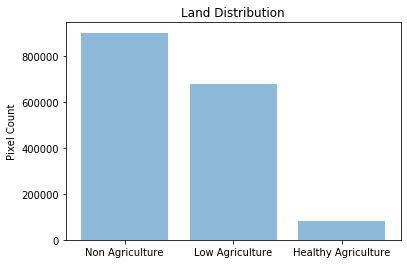

In [24]:
objects = ('Non Agriculture','Low Agriculture','Healthy Agriculture')
y_pos = np.arange(len(objects))
performance = list(df['label'].value_counts())

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Pixel Count')
plt.title('Land Distribution')

plt.show()

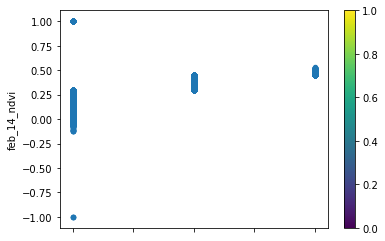

In [25]:
df.plot.scatter(x='label',y='feb_14_ndvi',colormap='viridis')

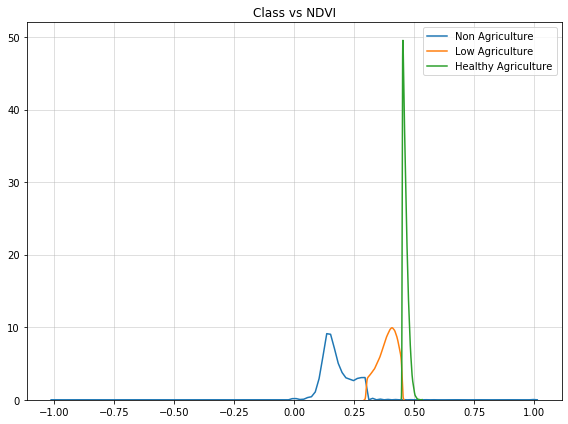

In [26]:
plt.figure(figsize = (8,6))
plt.grid(True, alpha =0.5)
sns.kdeplot(df['feb_14_ndvi'][df['label'] ==0], label = 'Non Agriculture')
sns.kdeplot(df['feb_14_ndvi'][df['label'] ==1], label = 'Low Agriculture')
sns.kdeplot(df['feb_14_ndvi'][df['label'] ==2], label = 'Healthy Agriculture')
plt.title('Class vs NDVI')
plt.tight_layout()


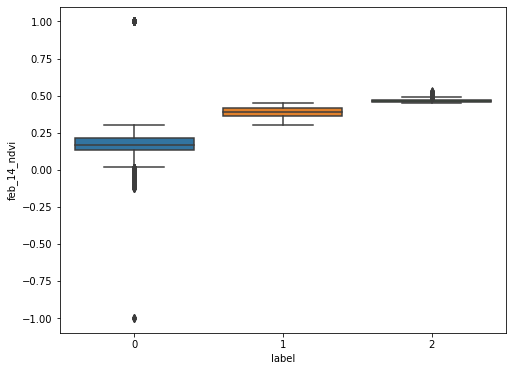

In [27]:
plt.figure(figsize = (8,6))
x = df['label']
y =df['feb_14_ndvi']
ax = sns.boxplot(x, y)

In [28]:
ny =df[100000:500000]

In [29]:
ny.head()

,feb_14_ndvi,feb_14_evi,label
308264,0.395,-1.293,1
308265,0.370,-1.400,1
308266,0.380,-0.628,1
308267,0.409,-0.887,1
308268,0.334,-0.345,1


In [30]:
ny['label'].value_counts()

1    256594
0    130240
2     13166
Name: label, dtype: int64

In [31]:
X = ny.drop('label', axis=1)
y = ny['label']

In [32]:
X.head()

,feb_14_ndvi,feb_14_evi
308264,0.395,-1.293
308265,0.370,-1.400
308266,0.380,-0.628
308267,0.409,-0.887
308268,0.334,-0.345


In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [34]:
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_train)
X_train = scaling.transform(X_train)
X_test = scaling.transform(X_test)

In [35]:
from sklearn.svm import SVC 
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train, y_train) 
svm_predictions = svm_model_linear.predict(X_test) 

In [36]:
print(accuracy_score(y_test,svm_predictions))

0.9886


In [37]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test,svm_predictions))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     39260
           1       0.98      1.00      0.99     76875
           2       0.99      0.71      0.83      3865

    accuracy                           0.99    120000
   macro avg       0.99      0.90      0.94    120000
weighted avg       0.99      0.99      0.99    120000



Text(0.5, 257.44, 'Predicted label')

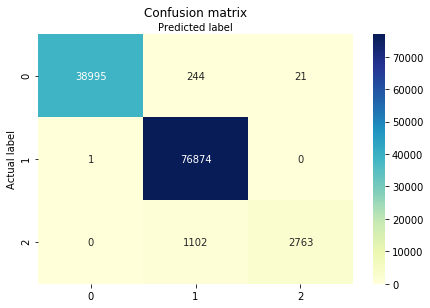

In [38]:
cnf_matrix = confusion_matrix(y_test,svm_predictions)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(cnf_matrix, annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [39]:
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 7).fit(X_train, y_train) 

In [40]:
pred = knn.predict(X_test)

In [41]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     39260
           1       1.00      1.00      1.00     76875
           2       0.98      0.99      0.98      3865

    accuracy                           1.00    120000
   macro avg       0.99      0.99      0.99    120000
weighted avg       1.00      1.00      1.00    120000



In [42]:
print(accuracy_score(y_test,pred))

0.9978166666666667


Text(0.5, 257.44, 'Predicted label')

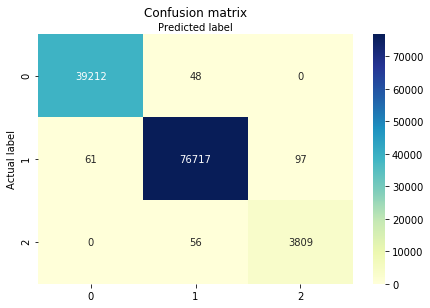

In [43]:
cnf_matrix = confusion_matrix(y_test, pred)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(cnf_matrix, annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [44]:
error_rate = []
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

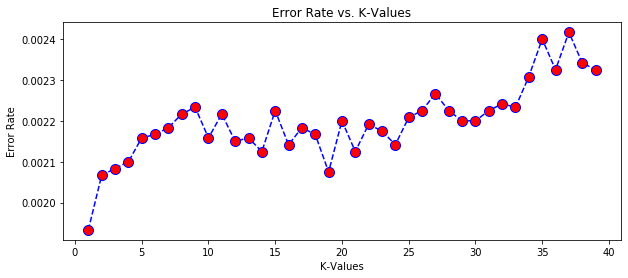

In [45]:
plt.figure(figsize=(10,4))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K-Values')
plt.xlabel('K-Values')
plt.ylabel('Error Rate')